In [46]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage import exposure

In [47]:
path = '/Desktop/temp_images/NP_penetration/' # The folder where the .tiff files are located

In [48]:
img = skimage.io.imread(os.path.expanduser('~')+path+'3p_40nm_brain_1_cortex_100x_z_stack_1.tif')
print(img.shape)
print(img.dtype)

(146, 1024, 1024)
uint16


In [49]:
DAPI = img[0::2]
NP = img[1::2]

print(DAPI.shape)
print(NP.shape)

(73, 1024, 1024)
(73, 1024, 1024)


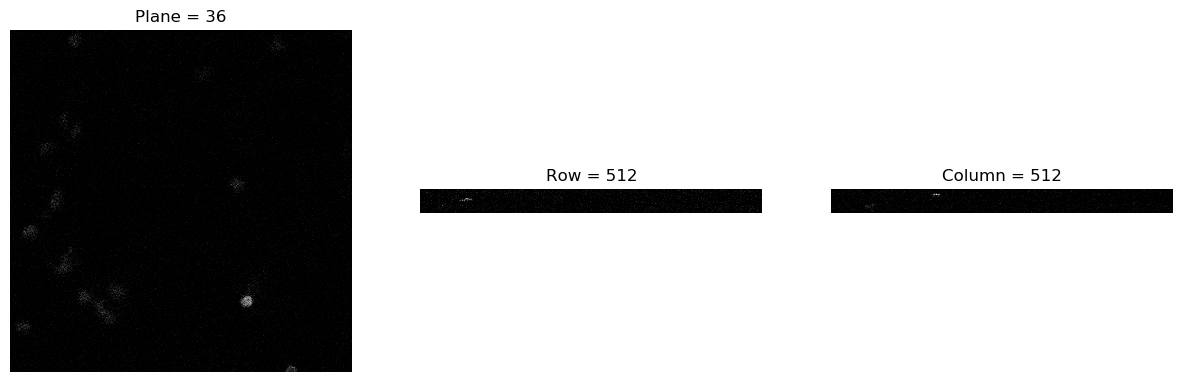

In [50]:
def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)


(n_plane, n_row, n_col) = DAPI.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, DAPI[n_plane // 2], title=f'Plane = {n_plane // 2}')
show_plane(b, DAPI[:, n_row // 2, :], title=f'Row = {n_row // 2}')
show_plane(c, DAPI[:, :, n_col // 2], title=f'Column = {n_col // 2}')

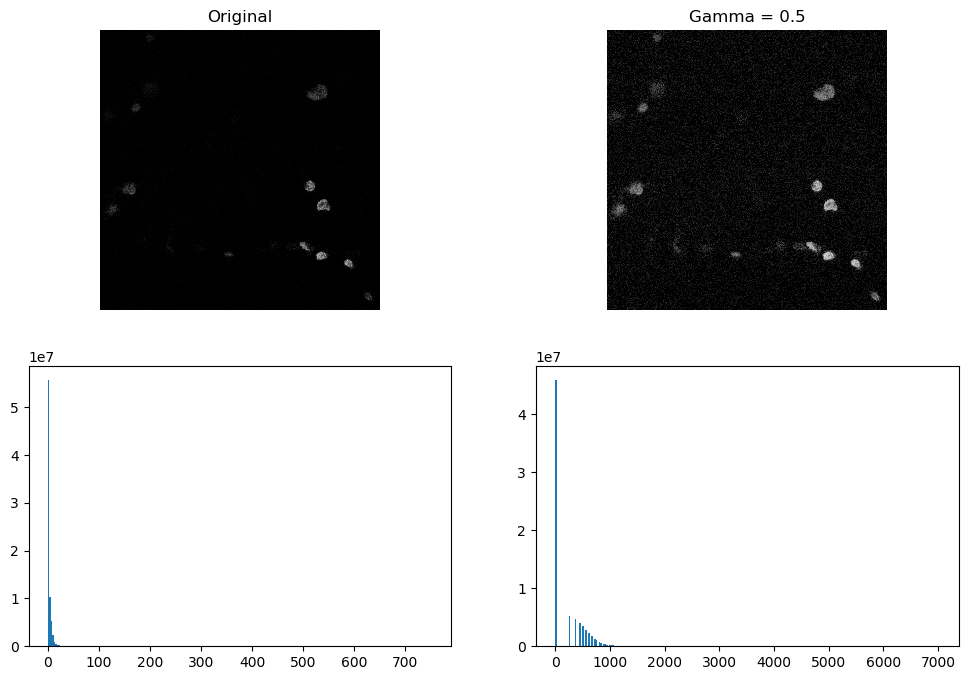

In [51]:
def plot_hist(ax, data, title=None):
    # Helper function for plotting histograms
    ax.hist(data.ravel(), bins=256)
    ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))

    if title:
        ax.set_title(title)


gamma_low_val = 0.5
gamma_low = exposure.adjust_gamma(DAPI, gamma=gamma_low_val)

_, ((a, b), (d, e)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

show_plane(a, DAPI[14], title='Original')
show_plane(b, gamma_low[14], title=f'Gamma = {gamma_low_val}')

plot_hist(d, DAPI)
plot_hist(e, gamma_low)

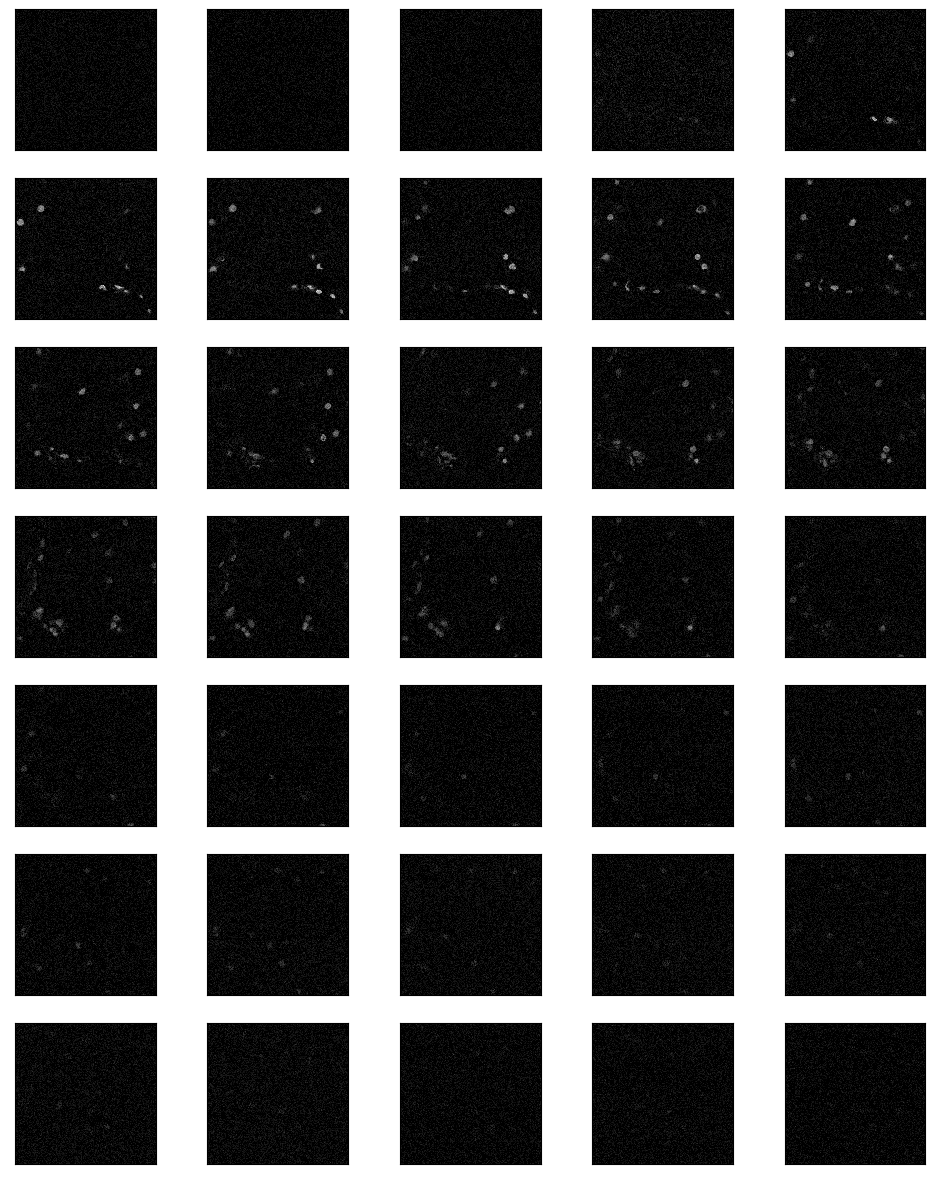

In [55]:
def display(im3d, cmap="gray", step=2):
    _, axes = plt.subplots(nrows=7, ncols=5, figsize=(12, 15))

    vmin = im3d.min()
    vmax = im3d.max()

    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])


display(gamma_low)

In [38]:
DAPI_intensities = np.sum(np.sum(DAPI, axis=1), axis=1)
NP_intensities = np.sum(np.sum(NP, axis=1), axis=1)
DAPI_intensities.shape
NP_intensities.shape

(73,)

In [39]:
z = np.arange(len(DAPI_intensities))
z.shape

(73,)

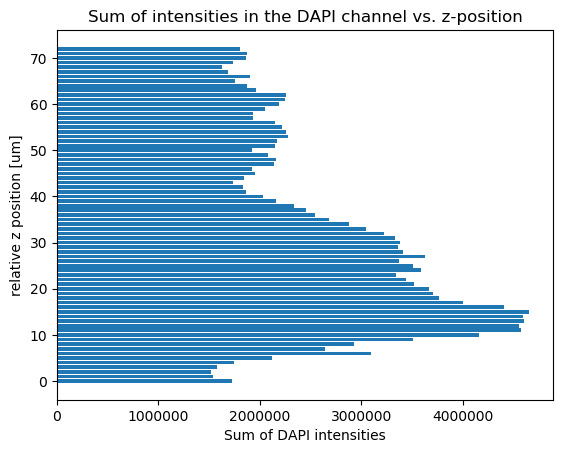

In [35]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(z, DAPI_intensities, align='center')
ax.set_ylabel('relative z position [um]')
ax.set_xlabel('Sum of DAPI intensities')
ax.set_title('Sum of intensities in the DAPI channel vs. z-position')

plt.show()

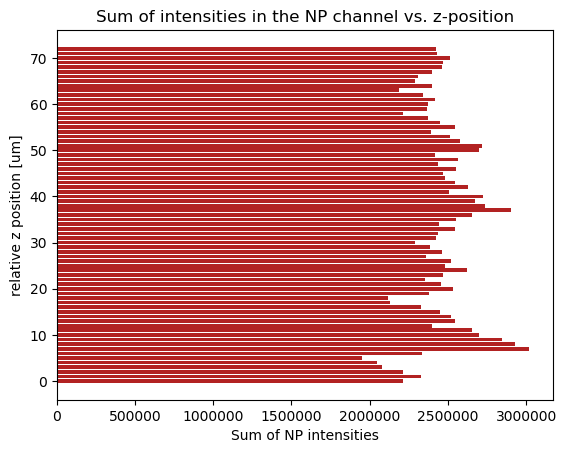

In [42]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(z, NP_intensities, align='center', color='firebrick')
ax.set_ylabel('relative z position [um]')
ax.set_xlabel('Sum of NP intensities')
ax.set_title('Sum of intensities in the NP channel vs. z-position')

plt.show()